In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
user_data = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-a-svechkov-8/Module 2./Module 2. Lesson 3/Tasks/3_user_data.csv', sep=",")
logs = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-a-svechkov-8/Module 2./Module 2. Lesson 3/Tasks/3_logs.csv', sep=",")

In [4]:
user_data

client  premium  age
0      46346    False   58
1       4391    False   55
2      27372    False   64
3      11989    False   44
4      60664    False   49
...      ...      ...  ...
2949   19411    False   29
2950   61579    False   50
2951   61221     True   64
2952   29863    False   46
2953   78499    False   36

[2954 rows x 3 columns]

In [5]:
logs

client  success  platform        time
0      40177     True     phone  1585412212
1      61468     True     phone  1585425658
2      35604    False     phone  1585459894
3       9961     True     phone  1585400189
4      10931     True  computer  1585468629
...      ...      ...       ...         ...
4495   64496    False  computer  1585459072
4496   73299     True     phone  1585458370
4497    8967     True     phone  1585465121
4498   52880    False     phone  1585455362
4499   40921     True     phone  1585437692

[4500 rows x 4 columns]

In [6]:
# task 2

# shape dtypes describe

logs.shape



(4500, 4)

In [7]:
logs.shape

(4500, 4)

In [8]:
logs.dtypes

client       int64
success       bool
platform    object
time         int64
dtype: object

In [9]:
logs.platform.nunique()

3

In [10]:
# task 3

client_success_actions = logs.query('success == True').client.value_counts().reset_index().rename(columns={"index":"client","client":"success_actions_count"})

In [11]:
max_success_actions_count = client_success_actions.success_actions_count.max();

In [12]:
type(max_success_actions_count)

numpy.int64

In [13]:
client_success_actions.dtypes

client                   int64
success_actions_count    int64
dtype: object

In [14]:
client_success_actions.query('success_actions_count == 41').sort_values('client').client.tolist()

[12179, 28719, 36165, 52870, 61468, 61473, 78349, 82563, 92584]

In [15]:
# task 4

logs.query('success == True').platform.value_counts()


phone       2019
computer    1090
tablet       180
Name: platform, dtype: int64

In [16]:
# task 5

logs_plus_user_data = logs.merge(user_data, how = "inner", on = "client")
logs_plus_user_data.query('premium == True').platform.value_counts()


phone       246
computer    150
tablet       24
Name: platform, dtype: int64

/opt/tljh/user/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/tljh/user/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


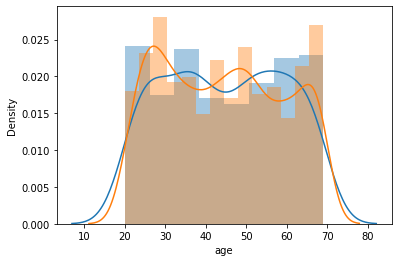

In [35]:
# task 6
logs_plus_user_data_premium = logs_plus_user_data.query('premium == True')
logs_plus_user_data_not_premium = logs_plus_user_data.query('premium == False')

sns.distplot(logs_plus_user_data_premium.age)
sns.distplot(logs_plus_user_data_not_premium.age)


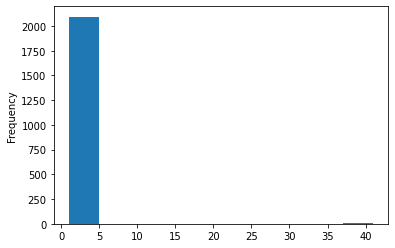

In [49]:
# task 7

logs_plus_user_data_success_count = logs_plus_user_data.query('success == True').client.value_counts().reset_index().rename(columns={"index":"client", "client":"count_operations"})

logs_plus_user_data_success_count.count_operations.plot.hist()

#logs_plus_user_data_success_count = logs_plus_user_data.query('success == True')

#sns.barplot(x='rider_score', y='percentage')



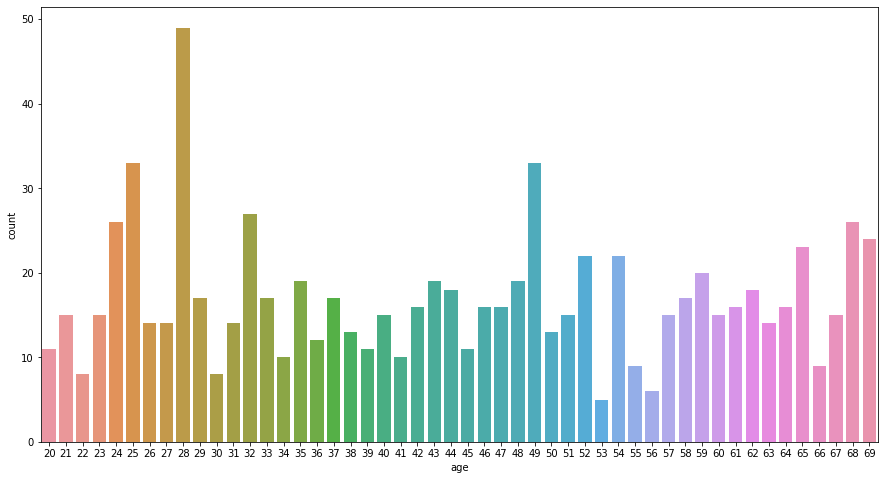

In [56]:
# task 8

logs_plus_user_data_success_count_computer = logs_plus_user_data.query('success == True & platform == "computer"')\
#.age.value_counts().reset_index().rename(columns={"index":"age", "age":"count_operations"})

plt.figure(figsize = (15,8))

sns.countplot(x='age', data = logs_plus_user_data_success_count_computer)